In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
mpl.rcParams['font.size'] = 16
%matplotlib inline

# TODO(Change data path on /phd/data/thunderstorm/AYSS_2019_PLASMA_2020


In [8]:
mpl.rcParams['font.size'] = 16

In [2]:
from scipy.stats import lognorm

In [4]:
data = [9,20,46,35,35,35,20,20,9,0,9,5,0,5,0,5]
data = list(map(lambda x: x/4, data))

In [5]:
np.sum(data)

63.25

In [3]:
image_path = '/home/zelenyy/npm/another/scientific-papers/AYSS-2018/article/pictures/'

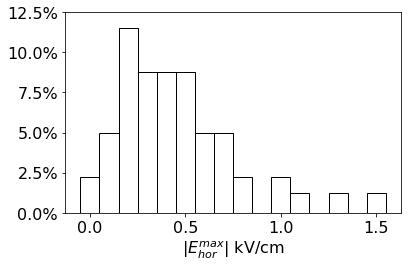

In [8]:
n = len(data)
x = np.arange(n)/10
# plt.subplot('211')
plt.bar(x, height=data, width=0.1, fill=False)
# plt.title('Distribution of horizontal electric field')
# plt.ylabel('percent')

ytick = plt.yticks()
plt.yticks(ytick[0], ['{:.1f}%'.format(l) for l in ytick[0]])
plt.xlabel(r'$|E^{max}_{hor}|$ kV/cm');
plt.tight_layout();
plt.savefig(os.path.join(image_path, '02_field.pdf'));


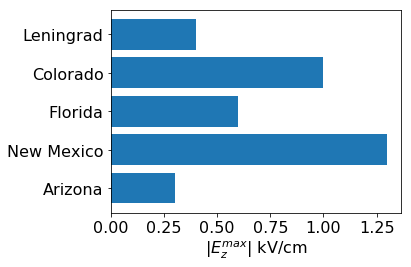

In [9]:
ax = plt.subplot('111')
# plt.title('Extremal value of vertical electric field (before 1989 y.)')
plt.xlabel(r'$|E^{max}_z|$ kV/cm')
EzMax = [0.3,1.3,0.6,1.0, .4]
country=['Arizona',
'New Mexico',
'Florida',
'Colorado',
'Leningrad']
m = len(country)
plt.barh(range(m), EzMax);
ax.set_yticks(range(m))
ax.set_yticklabels(country);
plt.tight_layout();
plt.savefig(os.path.join(image_path, '03_extremal_field.pdf'));

In [10]:
path = '/home/zelenyy/storage/slack/'
with open(path + 'stopingPower.txt') as fout:
    for i in range(4):
        fout.readline()
    text = fout.readlines()
    n = len(text)
    energy1, stopPower1 = np.zeros(n), np.zeros(n)
    for i in range(n):
        energy1[i], stopPower1[i] = map(float, text[i].split())
with open(path + 'airDensity.txt') as fout:
    text = fout.readlines()
    n = len(text)
    height, density = np.zeros(n), np.zeros(n)
    for i in range(n):
         height[i],  density[i] = tuple(map(float, text[i].split()))
# density = density/1000
# stopPowerDensity = min(stopPower)*density*1e5

In [11]:
energy = energy1[:-10]
stopPower = stopPower1[:-10]

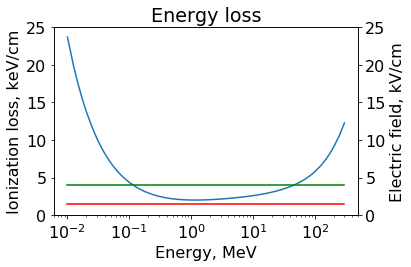

In [12]:

fig, ax1 = plt.subplots()
plt.plot(energy,stopPower*1.2e-3*1e3)
ax1.set_ylim(0,25)
n = len(energy)
# plt.plot(energy, np.ones(n)*4)
plt.xlabel(u'Energy, MeV')
plt.ylabel(r'Ionization loss, keV/cm')
plt.xscale('log')
plt.title(u'Energy loss');

ax2 = ax1.twinx()
ax2.set_ylim(0,25)
ax2.plot(energy, np.ones(n)*1.5, 'r')
ax2.plot(energy, np.ones(n)*4, 'g')
plt.ylabel(r'Electric field, kV/cm');
plt.tight_layout();
plt.savefig(os.path.join(image_path, '01_Gurevich.pdf'));

In [13]:
from scipy.interpolate import interp1d

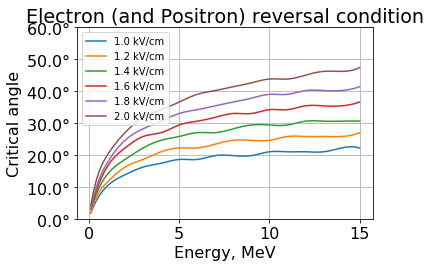

In [74]:
path = '/home/zelenyy/storage/Загрузки/ElecRevField{}Density0.526.txt'
field = [100, 120, 140, 160, 180, 200]
fieldcm = np.asarray(field)/100
for f in field:
    path1 = path.format(f)
    data = np.loadtxt(path1)
    fun = interp1d(data[:,0], data[:,1], kind=3)
    x = np.linspace(data[:,0].min(), data[:,0].max(), 100)
    plt.plot(x, 90 - fun(x), label='{} kV/cm'.format(f/100))
#     plt.plot(data[:,0], data[:,1])
plt.title('Electron (and Positron) reversal condition')
plt.xlabel('Energy, MeV')
plt.ylabel('Critical angle')
plt.ylim(ymin=0, ymax=60)
yticks, _ = plt.yticks()
plt.yticks(yticks, [r'${}\degree$'.format(t) for t in yticks]);
plt.legend(loc=0, fontsize=10);
plt.tight_layout();
plt.grid(True)
plt.savefig(os.path.join(image_path, '09_condition.pdf'));


In [36]:
def cut(events, path = '/home/zelenyy/storage/Загрузки/Global_Project/geant_simulations/electron_reversal/ElecRevField260Density0.526.txt'):

    data = np.loadtxt(path)
#     print(data)
    fun = interp1d(data[:,0], data[:,1], kind=3, fill_value="extrapolate")
    new = []
    theta = to_theta(events)
#     x = np.linspace(data[:,0].min(), data[:,0].max(), 100)
    for e, t in zip(events[:,1], theta):          
#         if e>15:
#             new.append([t,e])
#             continue
#         print(event[1])
        angle = fun(e)
        if angle<np.rad2deg(t) or np.rad2deg(t)<0 :
            new.append([t,e])
    return np.asarray(new)
        
    
def to_theta(data):
    z = data[:,0]
    return np.arctan((1-z**2)**0.5/z)

In [37]:
path = '/home/zelenyy/storage/Загрузки/data.txt'
data = np.loadtxt(path)


In [38]:
np.rad2deg(to_theta(data));

In [39]:
cutData =cut(data)

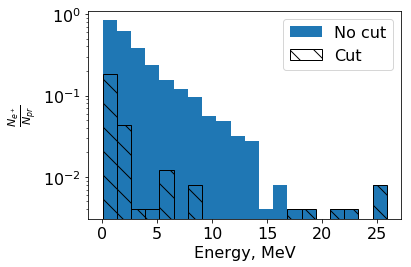

In [40]:
hist = plt.hist(data[:,1], bins = 20, weights=np.ones(data.shape[0])/250, label='No cut')
bins = hist[1]
plt.hist(cutData[:,1], bins = bins, weights=np.ones(cutData.shape[0])/250, label='Cut', fill=False, hatch='\\')
# plt.ylabel('Number positron by primary electron')
plt.ylabel(r"$\frac{N_{e^+}}{N_{pr}}$")
plt.xlabel('Energy, MeV')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(image_path, '04_energy_cut_positron.pdf'));

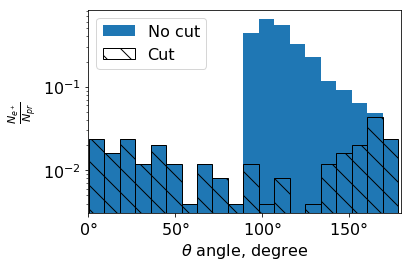

In [41]:
theta = np.rad2deg(to_theta(data)+np.pi/2)
hist = plt.hist(theta,bins = 20, weights=np.ones(theta.shape[0])/250, label='No cut')
loc, _ = plt.xticks()
bins = hist[1]
plt.hist(np.rad2deg(np.pi/2 + cutData[:,0]),bins = bins, weights=np.ones(cutData.shape[0])/250, label='Cut', fill=False, hatch='\\')

label = [ r'${}\degree$'.format(int(s)) for s in loc]
plt.xticks(loc, label);
plt.xlim(0,180)
plt.xlabel(r'$\theta$ angle, degree')
# plt.ylabel('Number positron by primary electron')
plt.ylabel(r"$\frac{N_{e^+}}{N_{pr}}$")
plt.yscale('log')
plt.legend();
plt.tight_layout()
plt.savefig(os.path.join(image_path, '05_theta_cut_positron.pdf'));

In [60]:
path = '/home/zelenyy/storage/Загрузки/TriaryElectrons.txt'
data = np.loadtxt(path)

In [61]:
def cutElectron(events, path = '/home/zelenyy/storage/Загрузки/Global_Project/geant_simulations/electron_reversal/ElecRevField260Density0.526.txt'):

    data = np.loadtxt(path)
#     print(data)
    fun = interp1d(data[:,0], data[:,1], kind=3, fill_value="extrapolate")
    new = []
    theta = to_theta(events)
#     x = np.linspace(data[:,0].min(), data[:,0].max(), 100)
    for e, t in zip(events[:,1], theta):          
#         if e>15:
#             new.append([t,e])
#             continue
#         print(event[1])
        angle = fun(e)
        if angle>np.abs(np.rad2deg(t)) or np.rad2deg(t)>0 :
            new.append([t,e])
    return np.asarray(new)

In [62]:
cutData = cutElectron(data, path = '/home/zelenyy/storage/Загрузки/Global_Project/geant_simulations/electron_reversal/ElecRevField140Density0.526.txt')
cutData = cutData[cutData[:,1]>0.15]

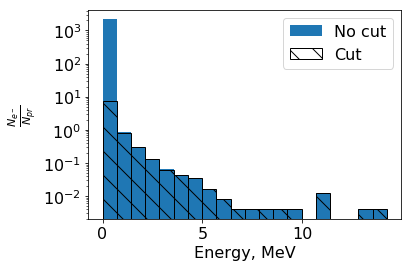

In [63]:
hist = plt.hist(data[:,1], bins = 20, weights=np.ones(data.shape[0])/250, label='No cut')
bins = hist[1]
plt.hist(cutData[:,1], bins = bins, weights=np.ones(cutData.shape[0])/250, label='Cut', fill=False, hatch='\\')
# plt.ylabel('Number electron by primary electron')
plt.ylabel(r"$\frac{N_{e^-}}{N_{pr}}$")
plt.xlabel('Energy, MeV')
plt.yscale('log')
plt.legend();
plt.tight_layout()
plt.savefig(os.path.join(image_path, '06_energy_cut_electron.pdf'));

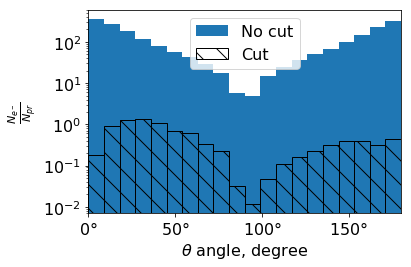

In [64]:
theta = np.rad2deg(to_theta(data)+np.pi/2)
hist = plt.hist(theta,bins = 20, weights=np.ones(theta.shape[0])/250, label='No cut')
loc, _ = plt.xticks()
bins = hist[1]
plt.hist(np.rad2deg(np.pi/2 + cutData[:,0]),bins = bins, weights=np.ones(cutData.shape[0])/250, label='Cut',  fill=False, hatch='\\')

label = [ r'${}\degree$'.format(int(s)) for s in loc]
plt.xticks(loc, label);
plt.xlim(0,180)
plt.xlabel(r'$\theta$ angle, degree')
# plt.ylabel('Number electron by primary electron')
plt.ylabel(r"$\frac{N_{e^-}}{N_{pr}}$")
plt.yscale('log')
plt.legend();
plt.tight_layout()
plt.savefig(os.path.join(image_path, '07_theta_cut_electron.pdf'));

In [3]:
path = '/home/zelenyy/storage/slack/gamma.cpp'
gammaGain = np.loadtxt(path)
path = '/home/zelenyy/storage/slack/vrode_pozitrony.cpp'
positronGain =  np.loadtxt(path)

In [5]:
gammaGain

array([[  1.00000000e+02,   0.00000000e+00],
       [  1.20000000e+02,   0.00000000e+00],
       [  1.40000000e+02,   2.00000000e-06],
       [  1.60000000e+02,   1.20000000e-05],
       [  1.80000000e+02,   5.20000000e-05],
       [  2.00000000e+02,   3.00000000e-05]])

In [2]:

def error_gain(gain, gamma=False):
    if gamma:
        number_of_primary_electron = np.array([100000, 50000, 20000, 10000])
    else:
        number_of_primary_electron = np.array([50000, 10000,10000, 500, 500, 100])
    return gain*((gain+1)/number_of_primary_electron/gain)**0.5

In [51]:
gammaField = np.array([100, 140, 180, 220])
# gammaGain =np.array([0.002, 0.012, 0.035, 0.08])
gammaGain =np.array([0.002, 0.012, 0.035, 0.08])

In [58]:
error_gain(gammaGain, True)*10

array([ 0.00141563,  0.00492829,  0.01345827,  0.02939388])

In [54]:
error_gain(positronGain[:,1])

array([  3.46410369e-06,   3.67428422e-05,   1.55601147e-04,
         2.49772286e-03,   5.44886121e-03,   1.64287986e-02])

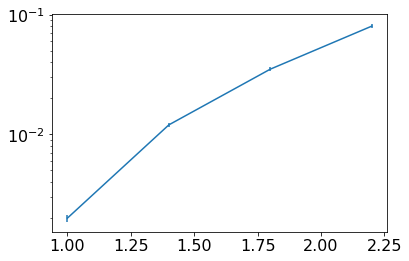

In [57]:
plt.errorbar(gammaField/100, gammaGain,yerr=error_gain(gammaGain, True), label='Gamma')
plt.yscale('log')

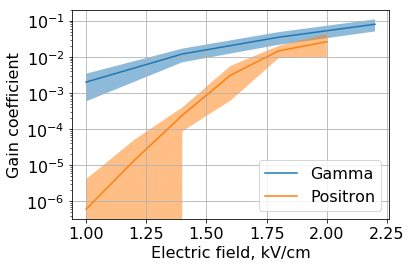

In [64]:


plt.plot(gammaField/100, gammaGain, label='Gamma')
dy = error_gain(gammaGain, True)*10
y = gammaGain
plt.fill_between(gammaField/100,y-dy, y+dy, alpha=0.5 )
plt.plot(positronGain[:,0]/100, positronGain[:,1],label='Positron')
dy = error_gain(positronGain[:,1])
y = positronGain[:,1]
plt.fill_between(positronGain[:,0]/100,y-dy, y+dy, alpha=0.5 )
plt.yscale('log')
plt.legend()
plt.xlabel('Electric field, kV/cm')
plt.ylabel('Gain coefficient');
plt.grid(True)
plt.tight_layout();
plt.savefig(os.path.join(image_path, '08_gain.pdf'));


# For PLASMA Thesis

In [6]:
image_path = '/home/zelenyy/npm/another/scientific-papers/PLASMA-2020/'

In [4]:
gammaField = np.array([100, 140, 180, 220])
gammaGain =np.array([0.002, 0.012, 0.035, 0.08])

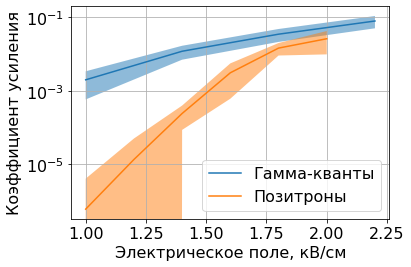

In [9]:
plt.plot(gammaField/100, gammaGain, label='Гамма-кванты')
dy = error_gain(gammaGain, True)*10
y = gammaGain
plt.fill_between(gammaField/100,y-dy, y+dy, alpha=0.5 )
plt.plot(positronGain[:,0]/100, positronGain[:,1],label='Позитроны')
dy = error_gain(positronGain[:,1])
y = positronGain[:,1]
plt.fill_between(positronGain[:,0]/100,y-dy, y+dy, alpha=0.5 )
plt.yscale('log')
plt.legend()
plt.xlabel('Электрическое поле, кВ/см')
plt.ylabel('Коэффициент усиления');
plt.grid(True)
plt.tight_layout();
plt.savefig(os.path.join(image_path, 'thesis.png'), dpi=300);